This is a script for performing the TCA on the aggregate regional data that is saved using the scripts in `/Users/minhnhatle/Documents/ExternalCode/wftoolbox/scripts/glm`.

In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import os
import h5py
import smartload.smartload as smart
import mat73

%matplotlib notebook

In [2]:
# Load the data
datapath = '/Users/minhnhatle/Documents/ExternalCode/wftoolbox/scripts/glm/processed/e57_data.mat'
data = smart.loadmat(datapath)


aggdata = data['agg_trials_master']

# Remove areas with nan's
nanareas = np.where(np.sum(np.sum(np.isnan(aggdata), axis=1), axis=1) == 0)[0]
Xdata = aggdata[nanareas, :, :]

# Subtract baseline
baseline = np.mean(Xdata[:,:10,:], axis=1)
Xdata = Xdata - baseline[:,np.newaxis,:]
# Xdata[Xdata < 0] = 0
# Xdata = Xdata.reshape((-1, Xdata.shape[2], Xdata.shape[3]))

<IPython.core.display.Javascript object>


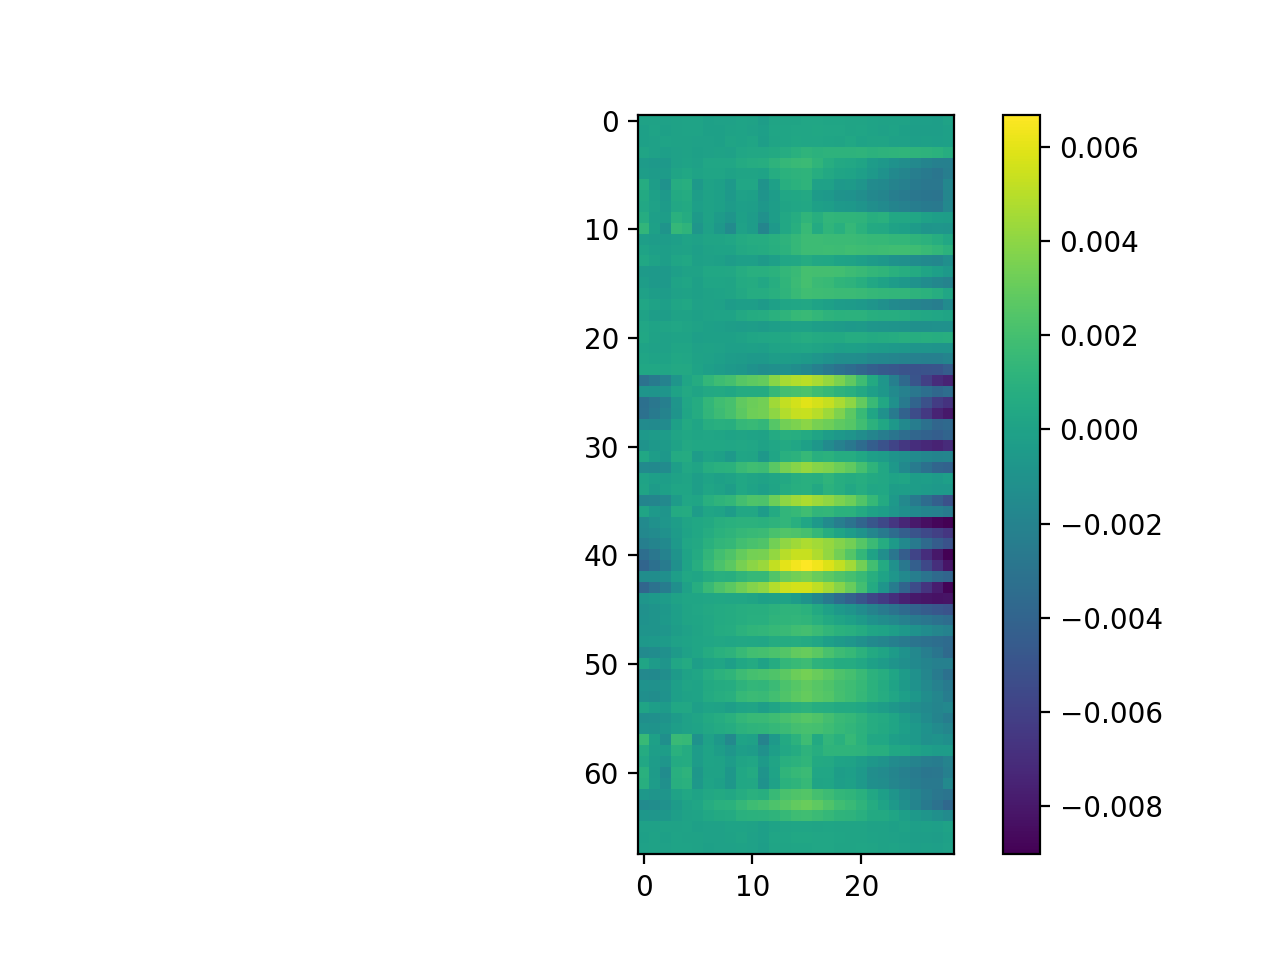

In [3]:
plt.figure()
plt.imshow(np.mean(Xdata, axis=2))
plt.colorbar()

In [16]:
# TCA fitting
# Fit an ensemble of models
ensemble = tt.Ensemble(nonneg=True, fit_method=None)
ensemble.fit(Xdata, ranks=[2,4,6,8,10], replicates=3)

Rank-2 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 24.6s


Rank-4 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 49.0s


Rank-6 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 68.7s


Rank-8 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 137.1s


Rank-10 models:  min obj, 0.82;  max obj, 0.83;  time to fit, 139.8s


<IPython.core.display.Javascript object>


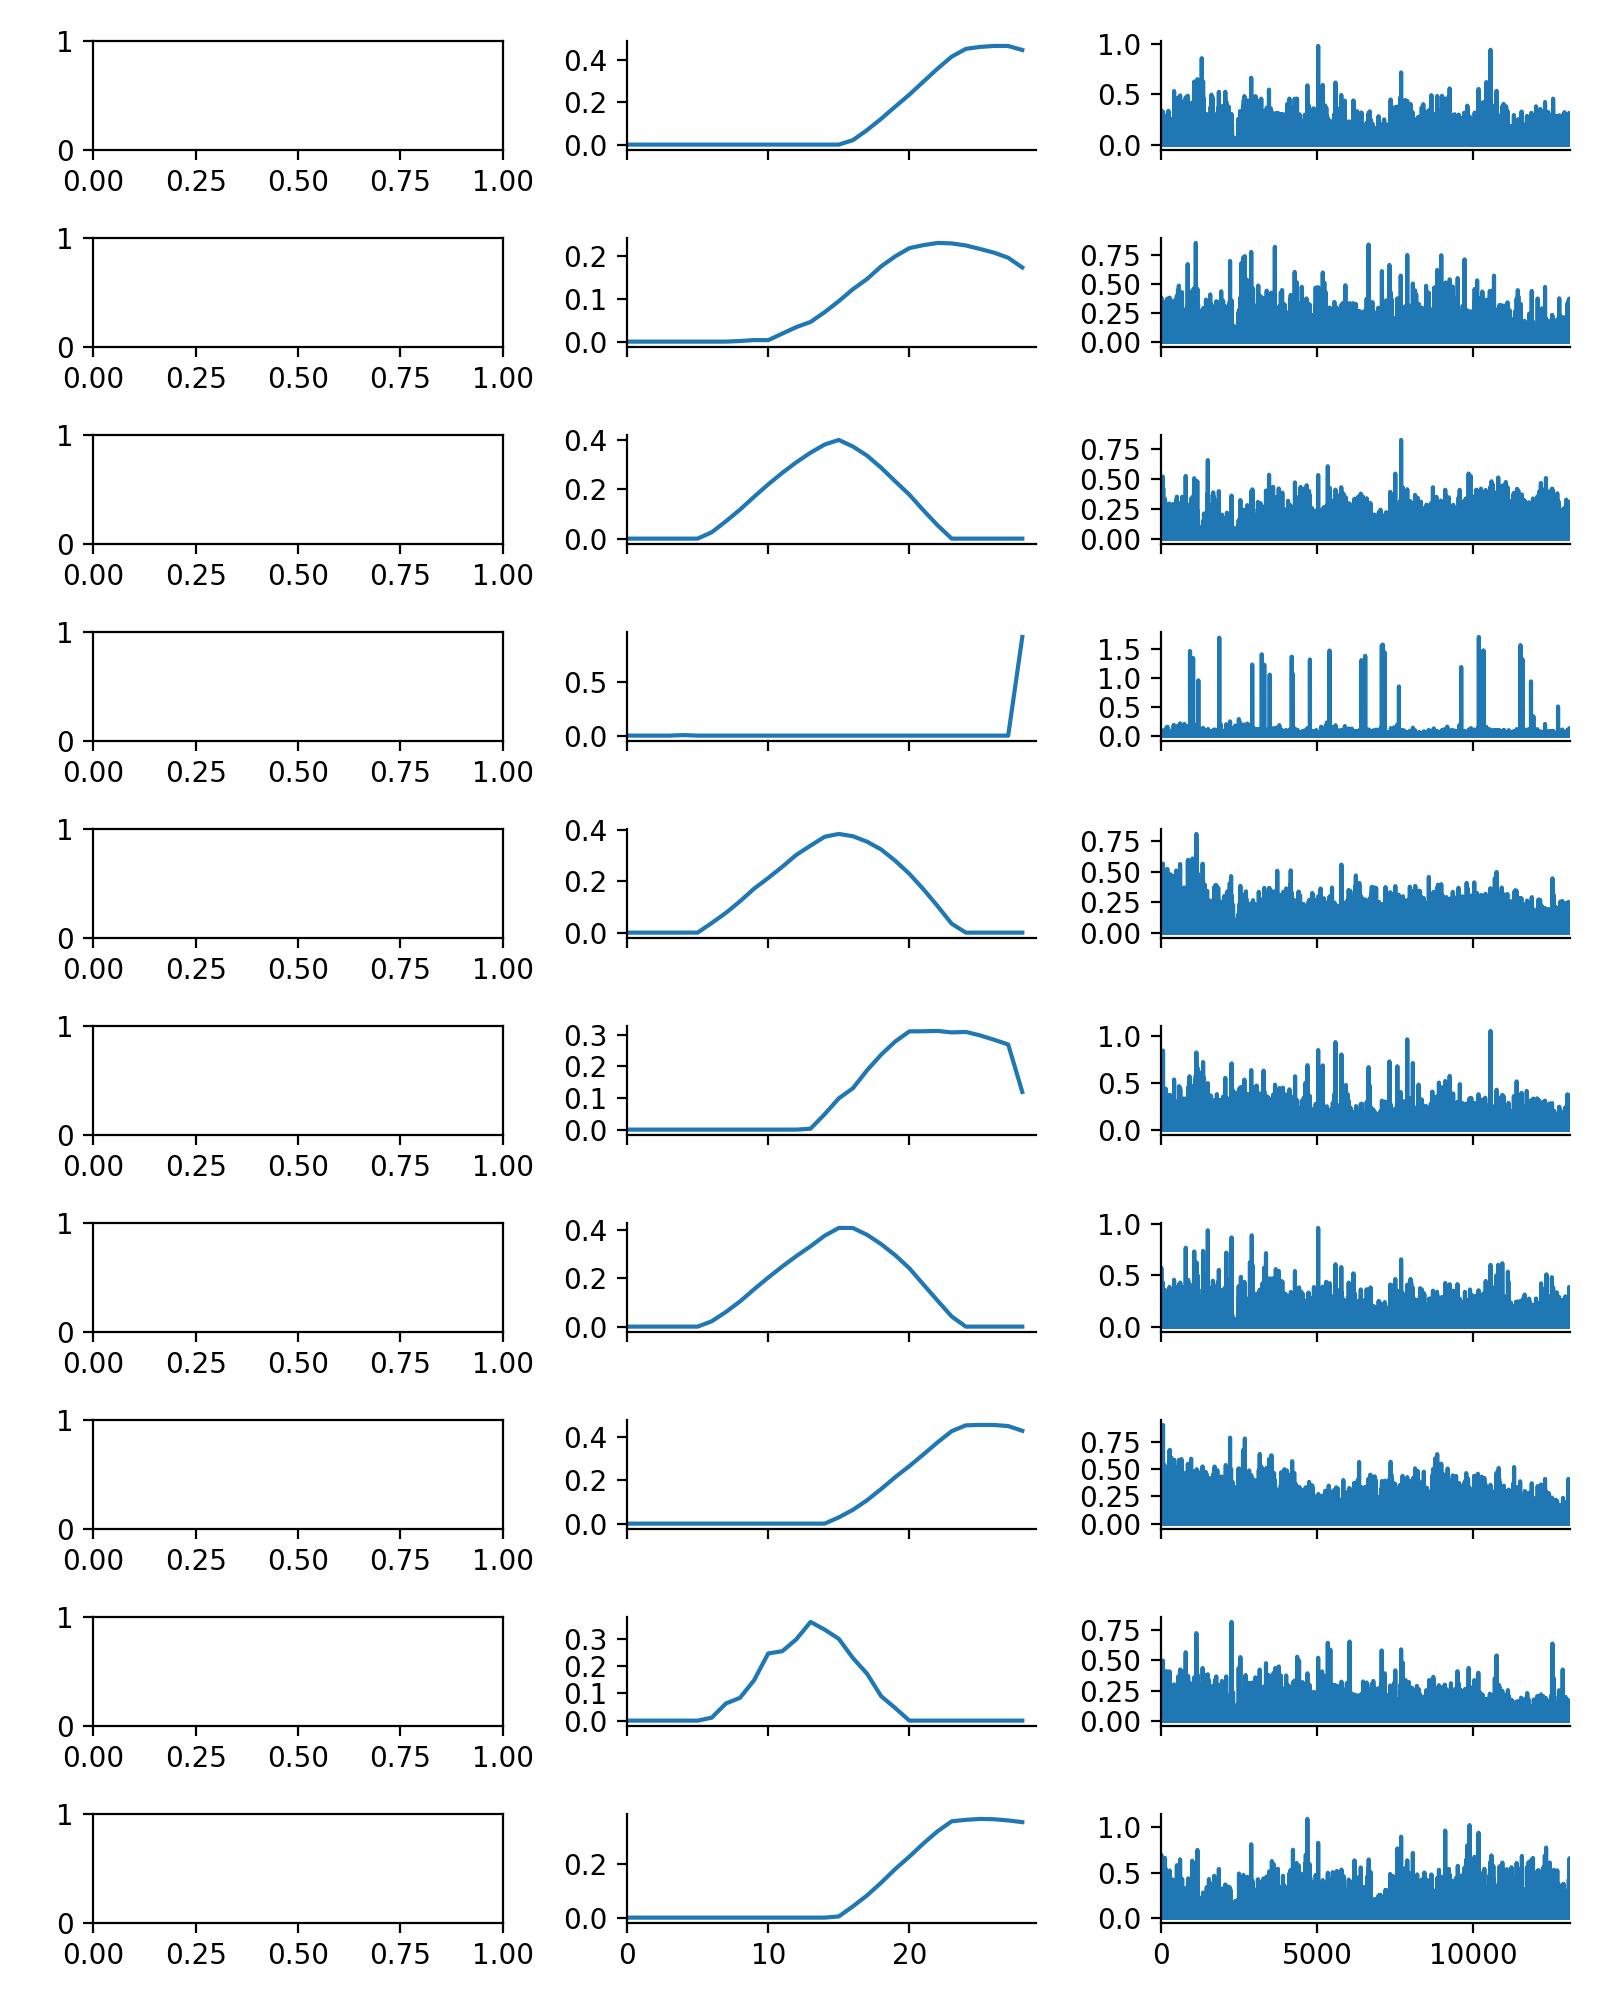

(<Figure size 800x1000 with 30 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object),
 array([[None, list([<matplotlib.lines.Line2D object at 0x7f888d130610>]),
         list([<matplotlib.lines.Line2D object at 0x7f88903d91c0>])],
        [None, list([<matplotlib.lines.Line2D object at 0x7f888d13dcd0>]),
         list([<matplotlib.lines.Line2D object at 0x7f888d145400>])],
        [None, list([<matplotlib.lines.Line2D object at 0x7f888d14b130>]),
 

In [13]:
tt.plot_factors(ensemble.factors(10)[0])  # plot the low-d factors

In [14]:
W,B,A = ensemble.factors(10)[0]

In [15]:
scipy.io.savemat('../processed/tcamatrices_e57b.mat', dict(W=W, B=B, A=A, selareas=nanareas))